## 13.2 Save your Neural Network Model to JSON

In [1]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init="uniform", activation="relu"))
model.add(Dense(8, init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Fit the model
model.fit(X, Y, nb_epoch=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 78.91%


Using Theano backend.


In [2]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

[WARNING] model.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True in save_weights!
Saved model to disk


In [3]:
# later...

# load json and create model
json_file = open('model.json','r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print "%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100)

acc: 78.91%


## 14.2 Checkpoint Neural Network Model Improvements

In [5]:
# MLP for Pima Indians Dataset Serialize to JSON and HDF5
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
import os
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init="uniform", activation="relu"))
model.add(Dense(8, init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
# checkpoint
filepath = "weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

Epoch 00000: val_acc improved from -inf to 0.67323, saving model to weights-improvement-00-0.67.hdf5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc improved from 0.67323 to 0.68504, saving model to weights-improvement-04-0.69.hdf5
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc did not improve
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did not improve
Epoch 00022: val_acc did not improve
Epoch 00023: val_a

## 14.3 Checkpoint Best Neural Network Model Only

In [7]:
# checkpoint
filepath = "weights-best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, callbacks=callbacks_list, verbose=0)

Epoch 00000: val_acc improved from -inf to 0.76772, saving model to weights-best.hdf5
Epoch 00001: val_acc improved from 0.76772 to 0.77165, saving model to weights-best.hdf5
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc improved from 0.77165 to 0.77559, saving model to weights-best.hdf5
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc improved from 0.77559 to 0.77953, saving model to weights-best.hdf5
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_a

## 14.4 Loading a Saved Neural Network Model

In [8]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

In [10]:
# load weights
model.load_weights("weights-best.hdf5")
# Compile model (required to make predictions)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Created model and loaded weights from file")

Created model and loaded weights from file


In [11]:
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 77.47%


## 15.2 Visualize Model Training History in Keras

In [22]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("data/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init="uniform", activation="relu"))
model.add(Dense(8, init="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, nb_epoch=150, batch_size=10, verbose=0)

In [24]:
# list all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


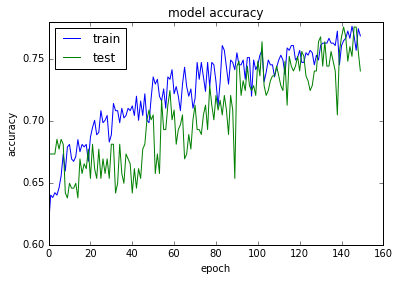

In [25]:
%matplotlib inline
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

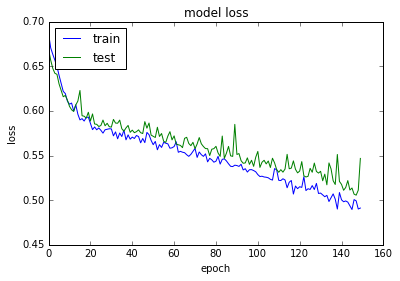

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()